In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
prices = []
with open('prices.txt') as f:
    for line in f:
        row = line.strip().split()
        row = [float(x) for x in row]
        prices.append(row)


In [4]:
print(len(prices))
print(len(prices[0]))

500
50


In [3]:
N = len(prices[0])
M = len(prices)
columns = [f'instrument{i}' for i in range(1, N+1)]
days = [i for i in range(1, M+1)]

In [4]:
df = pd.DataFrame(prices, columns=columns, index=days)

In [5]:
df

,instrument1,instrument2,instrument3,instrument4,instrument5,instrument6,instrument7,instrument8,instrument9,instrument10,...,instrument41,instrument42,instrument43,instrument44,instrument45,instrument46,instrument47,instrument48,instrument49,instrument50
1,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
2,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
3,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
4,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
5,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
497,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
498,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
499,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


In [11]:
ins1 = df['instrument1']

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

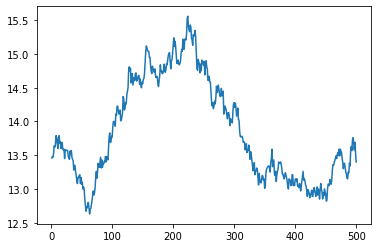

In [13]:
plt.plot(ins1)

c:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


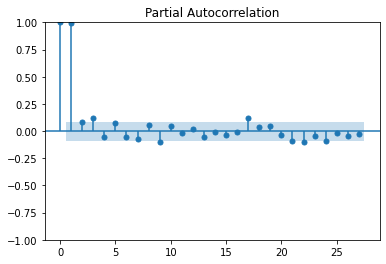

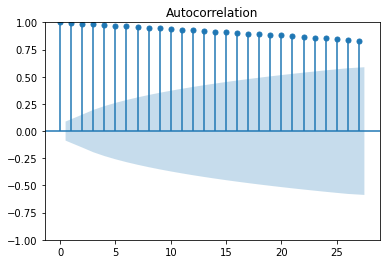

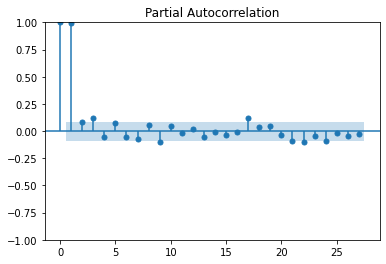

In [45]:
plot_acf(ins1)
plot_pacf(ins1)

(array([ 27., 103.,  94.,  66.,  22.,  40.,  44.,  62.,  30.,  12.]),
 array([12.63 , 12.923, 13.216, 13.509, 13.802, 14.095, 14.388, 14.681,
        14.974, 15.267, 15.56 ]),
 <BarContainer object of 10 artists>)

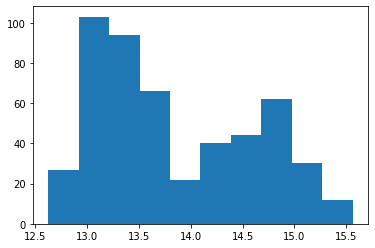

In [14]:
plt.hist(ins1)

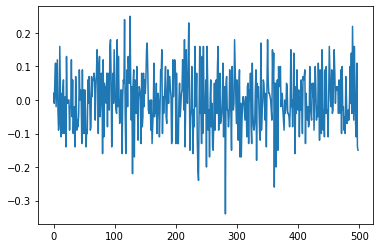

In [48]:
plt.plot(np.diff(ins1))

In [9]:
## testing ##
import random

## I expect this to become normally distributed over many realizations
## due it being a sum of bernoulli var
def gen_rand_walk(N):
    probs = [-1, 1]
    final = 0
    for _ in range(N):
        final += probs[random.randint(0, 1)]
    
    return final


rand_walk = []
for i in range(500):
    rand_walk.append(gen_rand_walk(500))

(array([  8.,  22.,  84., 149., 123.,  70.,  37.,   5.,   1.,   1.]),
 array([-66. , -49.4, -32.8, -16.2,   0.4,  17. ,  33.6,  50.2,  66.8,
         83.4, 100. ]),
 <BarContainer object of 10 artists>)

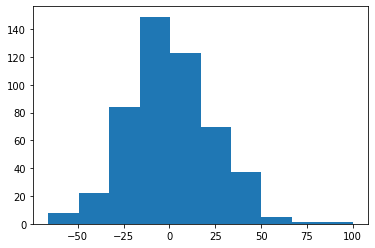

In [10]:
plt.hist(rand_walk)

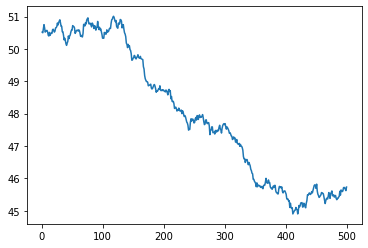

In [57]:
plt.plot(df['instrument4'])

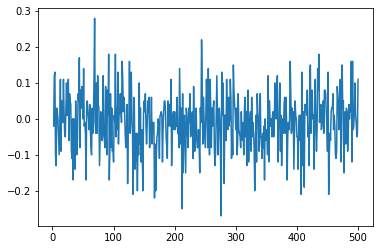

In [60]:
plt.plot(df['instrument4'].diff())

(array([  3.,  15.,  35.,  83., 144., 132.,  57.,  24.,   5.,   1.]),
 array([-0.27 , -0.215, -0.16 , -0.105, -0.05 ,  0.005,  0.06 ,  0.115,
         0.17 ,  0.225,  0.28 ]),
 <BarContainer object of 10 artists>)

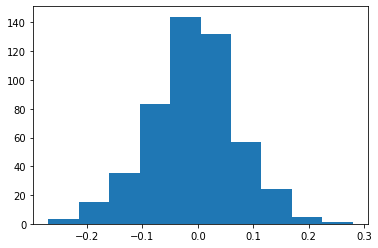

In [63]:
plt.hist(df['instrument4'].diff())

My initial conclusion is that instrument 1 and 4 look to be of the form: $X_t = \alpha_1X_{t-1} + \epsilon_t$. This is given by a slowly decaying ACF and a PACF which cuts off after lag 1 suggesting an AR(1) series. By taking a lag 1 difference to get $\epsilon_t = X_t - X_{t-1}$ i.e. `df['instrument{i}'].diff()` it's empirically normally distributed. So, $\epsilon_t \sim N(0, \sigma^2)$ at best guess - check a qqplot or use whatever shapiro-wilk test to be sure.

In [15]:
ins1_diff = np.array(df['instrument1'].diff())

c:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


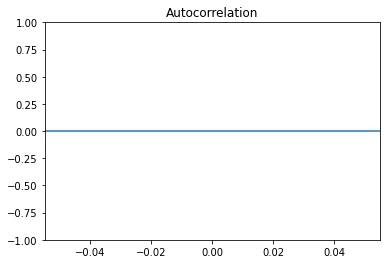

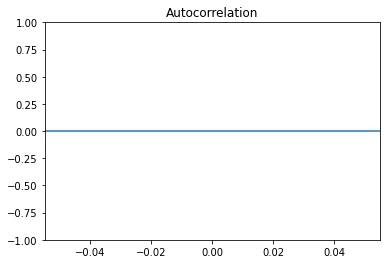

In [16]:
plot_acf(ins1_diff)

(array([  1.,   2.,   9.,  44.,  83., 150., 110.,  68.,  28.,   4.]),
 array([-0.34 , -0.281, -0.222, -0.163, -0.104, -0.045,  0.014,  0.073,
         0.132,  0.191,  0.25 ]),
 <BarContainer object of 10 artists>)

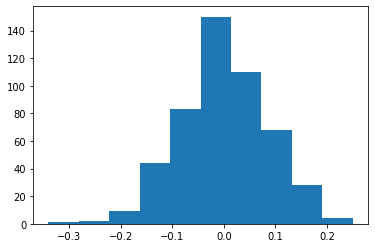

In [18]:
plt.hist(ins1_diff)

In [30]:
ls = [ df[f'instrument{i}'][100] for i in range(1, 51) ]

(array([6., 3., 5., 8., 2., 6., 9., 5., 4., 2.]),
 array([11.53 , 17.637, 23.744, 29.851, 35.958, 42.065, 48.172, 54.279,
        60.386, 66.493, 72.6  ]),
 <BarContainer object of 10 artists>)

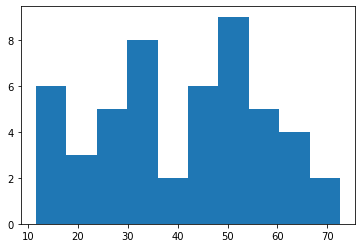

In [31]:
plt.hist(ls)

(array([ 2.,  2.,  3.,  7., 10., 10.,  9.,  2.,  3.,  2.]),
 array([-2.86252444, -2.31919109, -1.77585775, -1.2325244 , -0.68919105,
        -0.14585771,  0.39747564,  0.94080899,  1.48414233,  2.02747568,
         2.57080903]),
 <BarContainer object of 10 artists>)

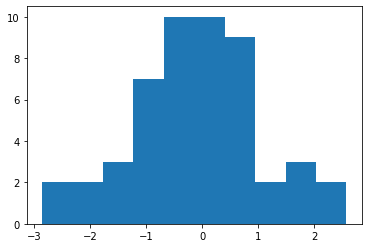

In [29]:
s = np.random.normal(0, 1, 50)
plt.hist(s)

(array([22., 89., 95., 70., 25., 45., 37., 73., 30., 14.]),
 array([2.53607494, 2.55693779, 2.57780065, 2.59866351, 2.61952637,
        2.64038923, 2.66125209, 2.68211494, 2.7029778 , 2.72384066,
        2.74470352]),
 <BarContainer object of 10 artists>)

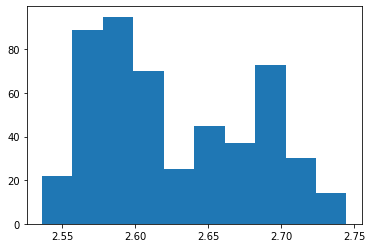

In [32]:
plt.hist(np.log(ins1))

In [33]:
ins2_diff = np.array(df['instrument2'].diff())

In [34]:
print(np.corrcoef(ins1_diff, ins2_diff))

[[nan nan]
 [nan nan]]


In [36]:
_ins1_diff = ins1_diff[1:]
_ins2_diff = ins2_diff[1:]
print(np.corrcoef(_ins1_diff, _ins2_diff))

[[ 1.         -0.04061963]
 [-0.04061963  1.        ]]


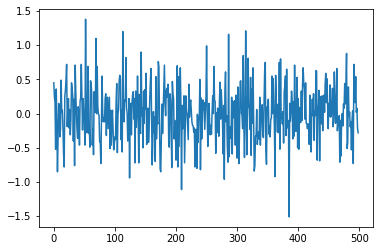

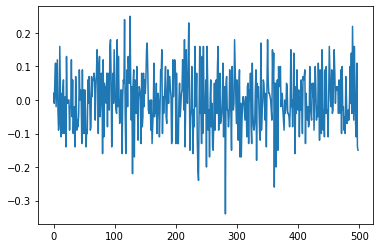

In [41]:
plt.plot(_ins2_diff)

fig, ax = plt.subplots()

ax.plot(_ins1_diff)

(array([  1.,   3.,  28.,  62., 125., 151.,  79.,  39.,   6.,   5.]),
 array([-1.51 , -1.221, -0.932, -0.643, -0.354, -0.065,  0.224,  0.513,
         0.802,  1.091,  1.38 ]),
 <BarContainer object of 10 artists>)

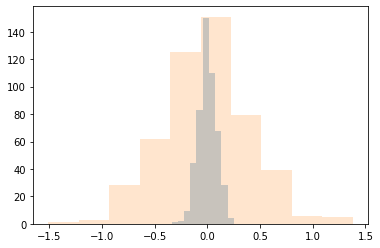

In [47]:
plt.hist(_ins1_diff, alpha = 0.3)
plt.hist(_ins2_diff, alpha = 0.2)

Daily Returns in instrument 1 and 2 are normally distributed, however instrument 2 has a higher variance

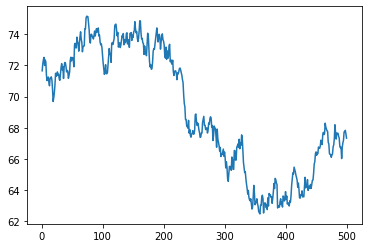

In [48]:
plt.plot(df['instrument2'])

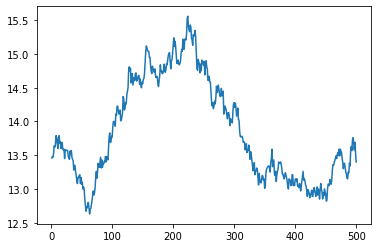

In [49]:
plt.plot(ins1)

In [30]:
from statsmodels.tsa.stattools import adfuller

possible_mean_revert = []

for i in range(1, 51):
    ins_i = df[f'instrument{i}']
    adf_test_p = adfuller(ins_i)
    # H0: unit root present
    if adf_test_p[1] < 0.05:
        print(f'possible stationarity for instrument {i}')
        t = adf_test_p[0]
        p = adf_test_p[1]
        print(f'tstat: {t} pval: {p}')
        possible_mean_revert.append(i)

possible stationarity for instrument 8
tstat: -3.448575937132982 pval: 0.009410264417328725
possible stationarity for instrument 29
tstat: -3.2068493061606262 pval: 0.01959162196426004
possible stationarity for instrument 44
tstat: -3.522099442620335 pval: 0.007437344820207259
possible stationarity for instrument 50
tstat: -3.553848707693216 pval: 0.006707170916056774


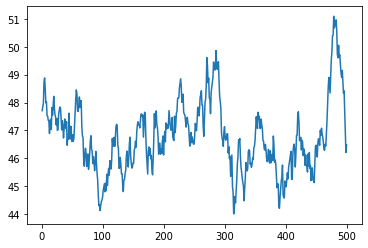

In [27]:
ins8 = df['instrument8']
plt.plot(ins8)

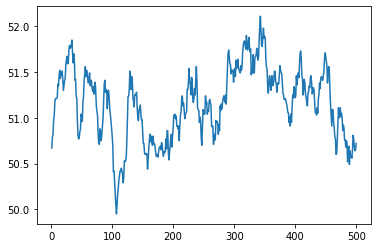

In [26]:
ins29 = df['instrument29']
plt.plot(ins29)

(array([ 19.,  42.,  96., 130.,  93.,  62.,  29.,  16.,   5.,   8.]),
 array([44.01 , 44.718, 45.426, 46.134, 46.842, 47.55 , 48.258, 48.966,
        49.674, 50.382, 51.09 ]),
 <BarContainer object of 10 artists>)

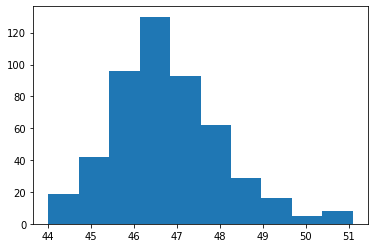

In [9]:
plt.hist(ins8)

(array([ 19.,  42.,  96., 130.,  93.,  62.,  29.,  16.,   5.,   8.]),
 array([44.01 , 44.718, 45.426, 46.134, 46.842, 47.55 , 48.258, 48.966,
        49.674, 50.382, 51.09 ]),
 <BarContainer object of 10 artists>)

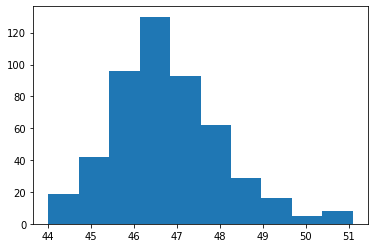

In [10]:
plt.hist(ins29)

c:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


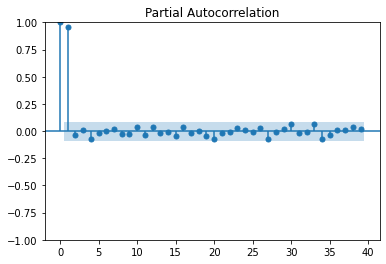

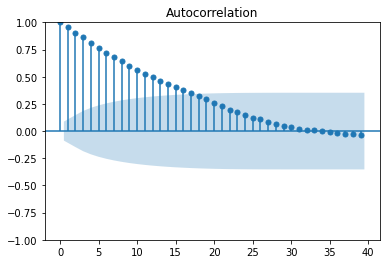

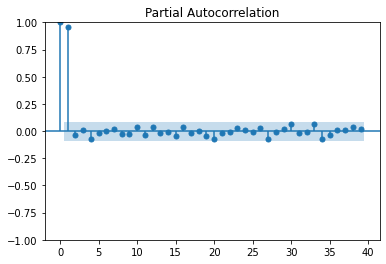

In [69]:
plot_acf(ins8, lags = np.arange(40))
plot_pacf(ins8, lags = np.arange(40))

In [11]:
## instrument 8 is possible ar(1) process: exponentially decreasing ACF with 1 significant spike
## find coeff in poly char eqn X[t] = a*X[t-1] + e[t]
ins8_diff = np.diff(ins8)

Below plot shows iid white noise $\sim (0, \sigma^2)$

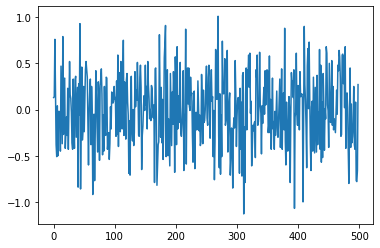

In [12]:
plt.plot(ins8_diff)

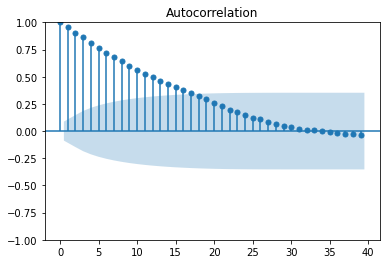

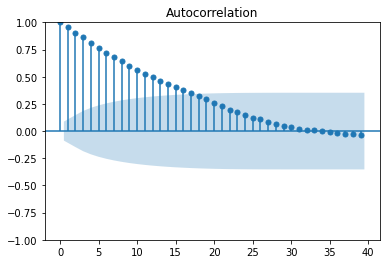

In [18]:
plot_acf(ins29, lags = np.arange(40))

c:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


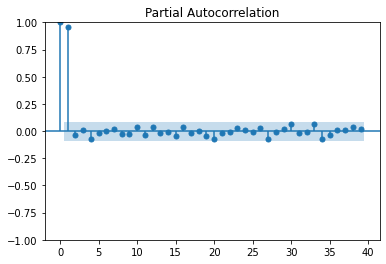

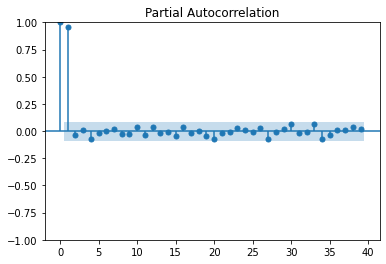

In [19]:
plot_pacf(ins29, lags = np.arange(40))

(array([  4.,  15.,  32.,  72.,  96., 105.,  85.,  60.,  23.,   7.]),
 array([-1.13 , -0.916, -0.702, -0.488, -0.274, -0.06 ,  0.154,  0.368,
         0.582,  0.796,  1.01 ]),
 <BarContainer object of 10 artists>)

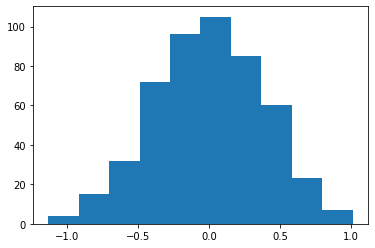

In [25]:
plt.hist(ins8_diff) # gaussian distn

In [24]:

from statsmodels.tsa.ar_model import AutoReg


In [32]:
possible_mean_revert
ins8 = df['instrument8']
ins29 = df['instrument29']
ins44 = df['instrument44']
ins50 = df['instrument50']

(array([0.07191781, 0.15068493, 0.17123288, 0.27739726, 0.33219178,
        0.26369863, 0.24315068, 0.14041096, 0.05136986, 0.01027397]),
 array([53.47 , 54.054, 54.638, 55.222, 55.806, 56.39 , 56.974, 57.558,
        58.142, 58.726, 59.31 ]),
 <BarContainer object of 10 artists>)

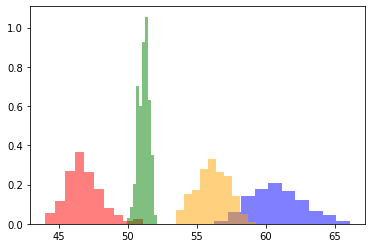

In [42]:
plt.hist(ins8, color = 'red', alpha = 0.5, density=True)
plt.hist(ins29, color = 'green', alpha = 0.5, density=True)
plt.hist(ins44, color = 'blue', alpha = 0.5, density=True)
plt.hist(ins50, color = 'orange', alpha = 0.5, density=True)

# Model Fitting
Empirically, instruments 8, 29, 44, and 50 are approximately Gaussian with different means. 29 follows the mean closely, the others swing widely around mean more.

In [ ]:
ls = [ins8, ins29, ins44, ins50]
# spikes at 1 for all. feel free to run to check.
for inst in ls:
    plot_pacf(inst, alpha = 0.05)

In [64]:
# subset up to 400 days
ins8_400 = ins8[:400] # treat this as 'training' data
ins8_last_100 = ins8[400:]
ins8_ar1_model = AutoReg(ins8_400, lags = 1).fit()

c:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Instrument 8 is $X_t = 0.9453X_{t-1} + 2.5490 + \varepsilon_t \equiv X_t = \alpha X_{t-1} + \varepsilon_t + C$

In [70]:
print(ins8_ar1_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            instrument8   No. Observations:                  400
Model:                     AutoReg(1)   Log Likelihood                -172.771
Method:               Conditional MLE   S.D. of innovations              0.373
Date:                Sat, 29 Jun 2024   AIC                            351.541
Time:                        16:31:50   BIC                            363.508
Sample:                             1   HQIC                           356.281
                                  400                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5490      0.772      3.301      0.001       1.035       4.062
instrument8.L1     0.9453      0.017     57.174      0.000       0.913       0.978
                                    

In [72]:
# our *theoretical* mean E[X_t] = C/1-a = 2.5490/(1-0.9453) ~ 46.59. This roughly matches the mean sample mean [below]:
ins8.mean()

46.7828

In [ ]:
## repeating process for the other instruments -- find mean and make strategy.